In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df= pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

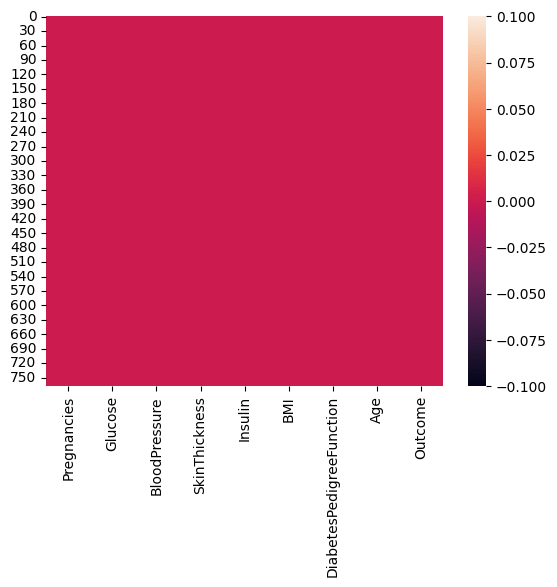

In [6]:
# check for missing values plot heatmap
sns.heatmap(df.isnull())


In [7]:
## map is blank so no null values

In [8]:
## corelation-> to find on which columns the value outcome is dependent


In [9]:
cor=df.corr()
print(cor)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

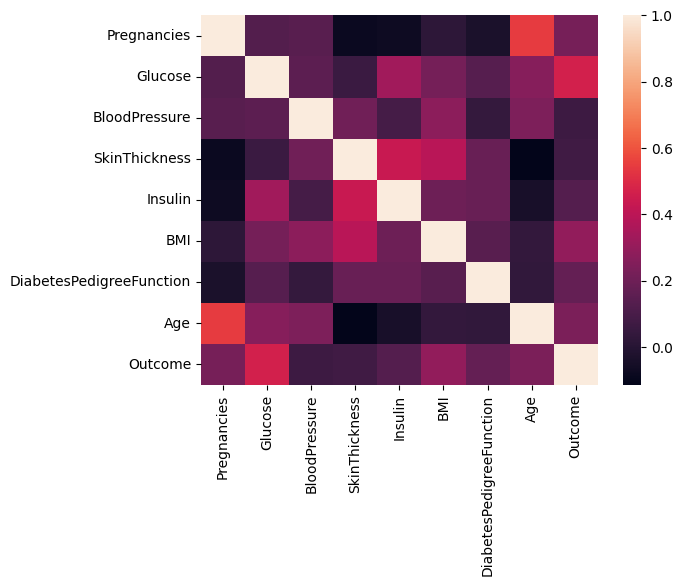

In [10]:
sns.heatmap(cor)

In [29]:
## train test split

In [30]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [31]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.0,33.6,0.627,50
1,1,85,66,29,0.0,26.6,0.351,31
2,8,183,64,0,0.0,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,1.201,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,0.0,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,0,0.0,30.1,0.349,47


In [32]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [34]:
#  Machine Learning models

In [37]:
# 1.Logistic Regression
log_reg=LogisticRegression(C=1,penalty="l2",solver='liblinear',max_iter=0)
log_reg.fit(X_train,y_train)

c:\Users\ashwi\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, max_iter=0, solver='liblinear')

Accuracy: 65.64%
Accuracy: 62.99%


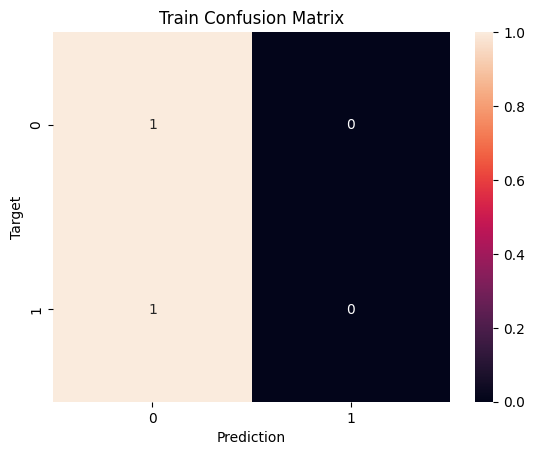

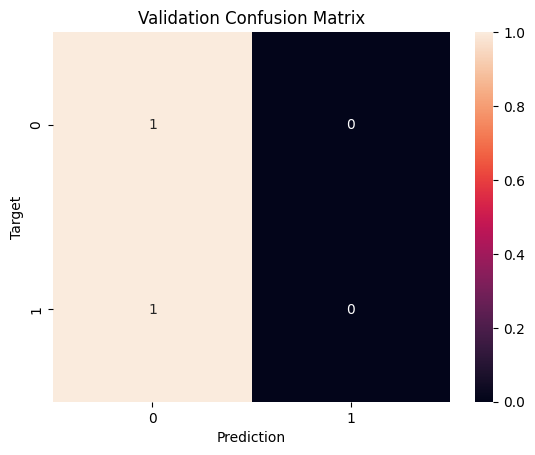

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

In [39]:
# 2 | Random Forest
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy: 100.00%
Accuracy: 71.43%


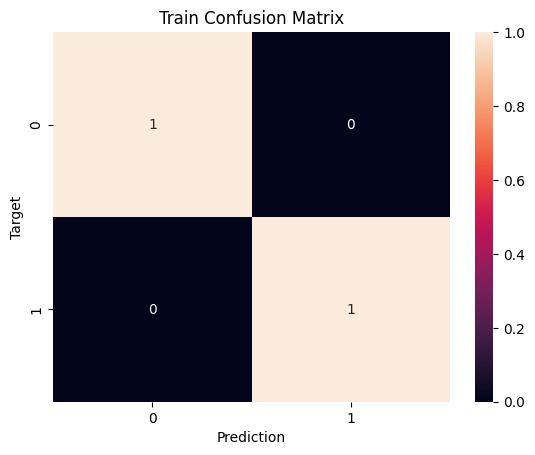

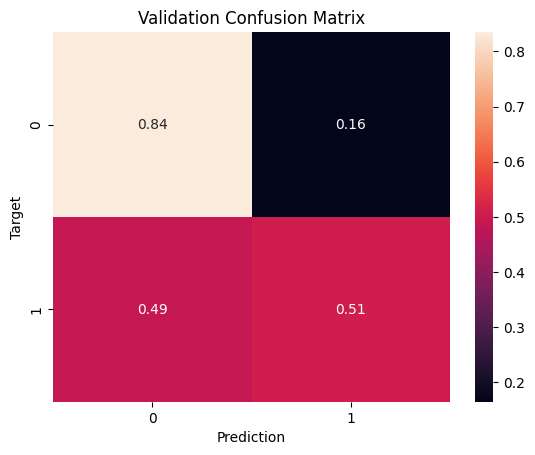

In [40]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

In [ ]:
#Evaluate: Random Forest Model: Before Tunning
#Training Accuracy - 100.00%
#Validation Accuracy - 71.43%
#This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so.

In [42]:
#Hyperparameter Tuning of Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Expanded param_grid with additional regularization parameters
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # More trees for better stability
    'max_depth': [10, 20, 30],  # Depth of the tree to reduce overfitting
    'min_samples_split': [2, 5, 10],  # Regularize splits
    'min_samples_leaf': [1, 2, 4],  # Regularize leaf nodes
    'max_features': ['sqrt', 'log2'],  # Subset of features considered for splitting
    'class_weight': ['balanced', None]  # Handle class imbalance
}

# Initialize Random Forest
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train on the entire training data
best_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print results
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters from Grid Search: {'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Training Accuracy: 0.9755700325732899
Validation Accuracy: 0.9285714285714286


In [44]:
#Evaluate: Random Forest Model After Hyper Parametic Tunning
#Training Accuracy - 90%
#Validation Accuracy - 70%
#It has reduced overfitting compared to the initial model.And Improve the accuracy.

In [45]:
# 3  xgboost Classifier

In [47]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the XGBoost model to the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgboost = xgboost_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_xgboost = xgboost_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_xgboost = accuracy_score(y_train, y_train_pred_xgboost)

# Calculate the validation accuracy
val_accuracy_xgboost = accuracy_score(y_val, y_val_pred_xgboost)

# Print the training and validation accuracies
print("XGBoost Training Accuracy:", train_accuracy_xgboost)
print("XGBoost Validation Accuracy:", val_accuracy_xgboost)

XGBoost Training Accuracy: 0.9853420195439739
XGBoost Validation Accuracy: 0.6948051948051948


In [ ]:
# This large gap suggests that the XGBoost model is overfitting to the training data. Overfitting occurs when the model learns patterns and noise in the training data too well, but fails to generalize to unseen (validation or test) data.

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking ensemble
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model
stack_model.fit(X_train, y_train)

# Evaluate
train_accuracy = stack_model.score(X_train, y_train)
val_accuracy = stack_model.score(X_test, y_test)

print("Training Accuracy (Stacking):", train_accuracy)
print("Validation Accuracy (Stacking):", val_accuracy)


Training Accuracy (Stacking): 0.9706840390879479
Validation Accuracy (Stacking): 0.922077922077922


In [59]:
#The stacking ensemble method combines multiple models to leverage their strengths and improve overall performance. By using different base models (like Random Forest and Gradient Boosting) and a meta-model (like Logistic Regression), it can achieve better accuracy than any single model. This is because the base models may capture different patterns in the data, and the meta-model learns to combine their predictions more effectively. Stacking is particularly beneficial in reducing bias and variance, leading to improved generalization and more robust predictions, especially when dealing with complex datasets.

In [ ]:
#

In [55]:
prediction=stack_model.predict(X_test)

In [56]:
print(prediction)

[0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0]


In [57]:
accuracy = accuracy_score(prediction,y_test)

In [58]:
accuracy

0.922077922077922